In [1]:
from mmdet.apis import init_detector, inference_detector
from mmdet.utils import register_all_modules
from mmdet.registry import VISUALIZERS
import mmcv

/root/anaconda3/envs/openmmlab/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# download the checkpoint demo
#!mim download mmdet --config rtmdet_tiny_8xb32-300e_coco --dest ./checkpoints
# config_file = '/root/userfolder/github/mmdetection/work_dirs/dab-detr_nocs_ViTAdapter_IOU_CRtrain_3enc_3dec_detachTS_expandgt/dab-detr_nocs_ViTAdapter_IOU_CRtrain_3enc_3dec.py'
# checkpoint_file = '/root/userfolder/github/mmdetection/work_dirs/dab-detr_nocs_ViTAdapter_IOU_CRtrain_3enc_3dec_detachTS_expandgt/epoch_10.pth'
config_file = '/root/userfolder/github/mmdetection/work_dirs/dab-detr_nocs_ViTDINO_Norm_CRtrain_3enc_3dec_2.12_8GPUS/dab-detr_nocs_ViTDINO_Norm_CRtrain_3enc_3dec.py'
checkpoint_file = '/root/userfolder/github/mmdetection/work_dirs/dab-detr_nocs_ViTDINO_Norm_CRtrain_3enc_3dec_2.12_8GPUS/epoch_48.pth'
# config_file = '/root/userfolder/github/mmdetection/work_dirs/dab-detr_sunrgbd_ViTDET_3enc_3dec_no_scale_1024_sam_preprocess_random_aug/dab-detr_sunrgbd_ViTDET_3enc_3dec_no_scale_1024_sam_preprocess_random_aug.py'
# checkpoint_file = '/root/userfolder/github/mmdetection/work_dirs/dab-detr_sunrgbd_ViTDET_3enc_3dec_no_scale_1024_sam_preprocess_random_aug/epoch_800.pth'

In [3]:
#Register all modules in mmdet into the registries
register_all_modules()
# build the model from a config file and a checkpoint file
model = init_detector(config_file, checkpoint_file, device='cpu')  # or device='cpu' 'device:0'

Loads checkpoint by local backend from path: /root/userfolder/github/mmdetection/work_dirs/dab-detr_nocs_ViTDINO_Norm_CRtrain_3enc_3dec_2.12_8GPUS/epoch_48.pth
02/28 15:46:32 - mmengine - WARNING - "FileClient" will be deprecated in future. Please use io functions in https://mmengine.readthedocs.io/en/latest/api/fileio.html#file-io
02/28 15:46:32 - mmengine - WARNING - "HardDiskBackend" is the alias of "LocalBackend" and the former will be deprecated in future.


In [4]:
# test a single image
#img = mmcv.imread( '/root/commonfile/fxf/nocs/Real/train/scene_2/0000_color.png', channel_order='rgb')
#img = mmcv.imread( '/root/commonfile/fxf/nocs/CAMERA/val/00007/0002_color.png', channel_order='rgb')
img = mmcv.imread( '/root/commonfile/fxf/nocs/Real/test/scene_1/0000_color.png', channel_order='rgb')
#img = mmcv.imread( '/root/commonfile/fxf/sunrgbd/sunrgbd_trainval/image/008000.jpg', channel_order='rgb')
result = inference_detector(model, img)
print(result)

torch.Size([1, 768, 35, 46])


/root/anaconda3/envs/openmmlab/lib/python3.8/site-packages/mmengine/visualization/visualizer.py:984: UserWarning: Since the spatial dimensions of overlaid_image: (480, 640) and featmap: torch.Size([35, 46]) are not same, the feature map will be interpolated. This may cause mismatch problems ！
  warnings.warn(
/root/userfolder/github/mmdetection/mmdet/models/layers/positional_encoding.py:84: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  dim_t = self.temperature**(2 * (dim_t // 2) / self.num_feats)
/root/userfolder/github/mmdetection/mmdet/models/layers/transformer/utils.py:71: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future ver

<DetDataSample(

    META INFORMATION
    scale_factor: (1.0, 1.0)
    img_path: None
    img_id: 0
    batch_input_shape: (480, 640)
    img_shape: (480, 640)
    pad_shape: (480, 640)
    ori_shape: (480, 640)

    DATA FIELDS
    ignored_instances: <InstanceData(
        
            META INFORMATION
        
            DATA FIELDS
            rots_norm: tensor([], size=(0, 9))
            bboxes: tensor([], size=(0, 4))
            poses: tensor([], size=(0, 3))
            scales_norm: tensor([])
            rots: tensor([], size=(0, 9))
            labels: tensor([], dtype=torch.int64)
            sizes: tensor([], size=(0, 3))
        ) at 0x7f34382f76d0>
    gt_instances: <InstanceData(
        
            META INFORMATION
        
            DATA FIELDS
            rots_norm: tensor([], size=(0, 9))
            bboxes: tensor([], size=(0, 4))
            poses: tensor([], size=(0, 3))
            scales_norm: tensor([])
            rots: tensor([], size=(0, 9))
            

/root/userfolder/github/mmdetection/mmdet/models/dense_heads/dab_detr_head_nocs_norm.py:623: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  bbox_index = indexes // self.num_classes


In [5]:
# init the visualizer(execute this block only once)
visualizer = VISUALIZERS.build(model.cfg.visualizer)
# the dataset_meta is loaded from the checkpoint and
# then pass to the model in init_detector
visualizer.dataset_meta = model.dataset_meta

02/28 15:46:34 - mmengine - WARNING - `Visualizer` backend is not initialized because save_dir is None.


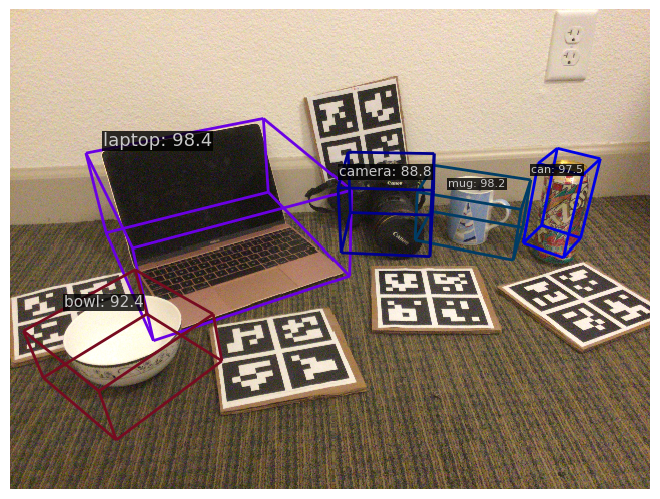

In [6]:
# show the results
visualizer.add_datasample(
    'result',
    img,
    data_sample=result,
    draw_gt=False,
    wait_time=0,
    pred_score_thr=0.2,
)
visualizer.show()